<h1><center>Sentiment analysis of Ukraine and Russia tweets </center></h1>

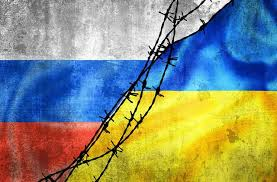

On this notebook I analyse the data scraped from twitter in the notebook '*Twitter_data_scraper*'. \
The data contains **up to 2500 daily tweets** scraped with the following criteria: 
- Language: English 
- Text contains: Ukraine / Russia (depending on the dataset)
- Time: between Dec. 2nd 2021 and Mar. 30th 2022, scraped at random hours 

Due to the huge size of this dataset, only the data scraper is uploaded and not the data itself. This data can be scraped by simply running the *twitter-scraper* notebook in this repository!

### Important note
The data was saved using a tilde (~ or alt+126) separator, as I was afraid that using other characters like '\n' or ',' or ';' could split tweets just because they were included in the text itself by the users.

Let's get started!

In [1]:
import pandas as pd 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import re
from itertools import chain
import pylab
import matplotlib.dates as mdates
import datetime as dt

In [2]:
colnames=['time', 'text', 'tweet_id'] 

ukr_tweets = pd.read_csv(r'data\ukraine_tweets.csv', sep = '~', names = colnames, index_col=[0], skiprows = 1)
ukr_tweets['time'] = pd.to_datetime(ukr_tweets['time'])
ukr_tweets['text'] = ukr_tweets['text'].str.lower()
ukr_tweets.head()

,time,text,tweet_id
0,2021-12-02 08:59:45+00:00,misc news#biden to counter china &amp; russia ...,1466331241829978117
1,2021-12-02 08:59:31+00:00,"@indiaspeakspr we have to stay neutral.and, we...",1466331181255856130
2,2021-12-02 08:59:20+00:00,new story on npr: buildup of russian forces al...,1466331135978450949
3,2021-12-02 08:59:18+00:00,@bh_friedman @yuanyi_z i'm not sure it's realp...,1466331129124954112
4,2021-12-02 08:59:18+00:00,russia detains suspected ukraine spies https:/...,1466331127275270145


In [3]:
rus_tweets = pd.read_csv(r'data\russia_tweets.csv', sep = '~', names = colnames, index_col=[0], skiprows = 1)
rus_tweets['time'] = pd.to_datetime(rus_tweets['time'])
rus_tweets['text'] = rus_tweets['text'].str.lower()
rus_tweets.head()

,time,text,tweet_id
0,2021-12-02 15:59:59+00:00,#brics 20-yr mark global gdp weighting #china ...,1466436994318356501
1,2021-12-02 15:59:57+00:00,@kepolka all in kenya need brits consent: 1969...,1466436985925607436
2,2021-12-02 15:59:47+00:00,@a_windowlicker @chris_meloni obama and biden ...,1466436944322306064
3,2021-12-02 15:59:43+00:00,@darthchillash @cicinoragnar @xboxgamepasspc @...,1466436930564939786
4,2021-12-02 15:59:43+00:00,@boromir216 @cwright70254213 @disclosetv 😭😭😭😭😭...,1466436929080242181


We will have to do a lot of **data cleaning**. I will note all the steps in this cell: 
1. Remove tweet_id column (we're not really interested in that)
2. Remove URLs
3. Analyse #hashtags and @tags and decide if only to keep their respective wordsor remove them completely 
4. General processing (stop words removal, stemming or lemmatization)

In [4]:
#1. Remove tweet_id column
ukr_tweets.drop(columns = 'tweet_id', inplace=True)
rus_tweets.drop(columns = 'tweet_id', inplace=True)

In [5]:
#2. Remove URLS (commenting as it's incredibly slow)
# url_pattern = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"

# def clean_urls(text, pattern): 
#     return re.sub(pattern, '', text)

# ukr_tweets['text'] = ukr_tweets['text'].apply(lambda x: clean_urls(x, url_pattern))
# rus_tweets['text'] = rus_tweets['text'].apply(lambda x: clean_urls(x, url_pattern))

In [6]:
#3. Inspection on hashtags and tags

def find_sequence(text, pattern):
    return re.findall(pattern,text)

def tags(df, pattern):
    ''' Return a list of all pattern matches within the "text" column of the dataframe'''
    taglist = df['text'].apply(lambda x: find_sequence(x, pattern))
    return list(chain.from_iterable(taglist))

h_pattern = r"#(\w+)"
ukr_hashtags = tags(ukr_tweets, h_pattern)
rus_hashtags = tags(rus_tweets, h_pattern)

t_pattern = r"@(\w+)"
ukr_tags =  tags(ukr_tweets, t_pattern)
rus_tags = tags(rus_tweets, t_pattern)

In [7]:
#Prepare data for wordcloud plot

ukr_hash_joined = ' '.join(ukr_hashtags)
rus_hash_joined = ' '.join(rus_hashtags)
ukr_tag_joined = ' '.join(ukr_tags)
rus_tag_joined = ' '.join(rus_tags)

#Let's also remove ukraine and russia from the tags..

def word_removal(ls):
    for r in (("ukraine", ""), ("russia", "")):
        ls = ls.replace(*r) 
    return ls 

ukr_hash_joined = word_removal(ukr_hash_joined)   
rus_hash_joined = word_removal(rus_hash_joined)   
ukr_tag_joined = word_removal(ukr_tag_joined)   
rus_tag_joined = word_removal(rus_tag_joined)   

(-0.5, 399.5, 199.5, -0.5)

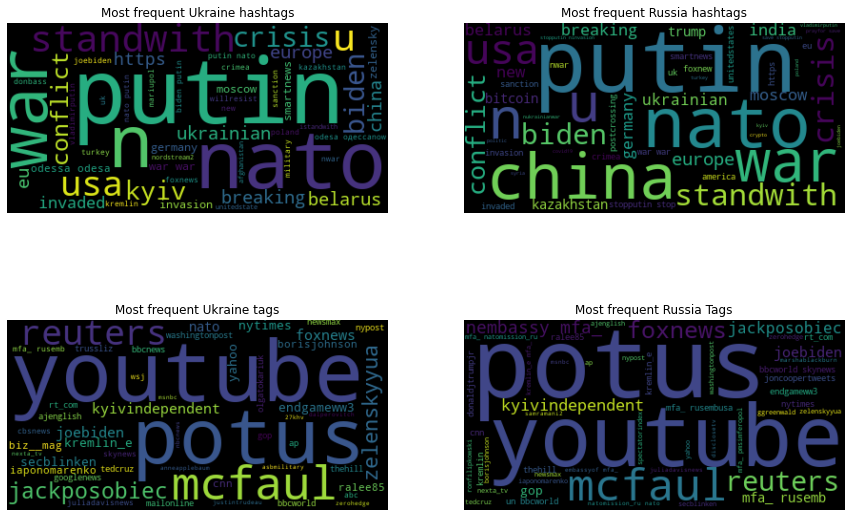

In [8]:
from wordcloud import WordCloud, ImageColorGenerator

fig, axs = plt.subplots(2,2,figsize = (15,10))
wordcloud_spam = WordCloud(max_words = 50).generate(ukr_hash_joined)
axs[0,0].imshow(wordcloud_spam, interpolation='bilinear')
axs[0,0].set_title('Most frequent Ukraine hashtags')
axs[0,0].axis("off")

wordcloud_ham = WordCloud(max_words = 50).generate(rus_hash_joined)
axs[0,1].imshow(wordcloud_ham, interpolation='bilinear')
axs[0,1].set_title('Most frequent Russia hashtags')
axs[0,1].axis("off")

wordcloud_spam = WordCloud(max_words = 50).generate(ukr_tag_joined)
axs[1,0].imshow(wordcloud_spam, interpolation='bilinear')
axs[1,0].set_title('Most frequent Ukraine tags')
axs[1,0].axis("off")

wordcloud_ham = WordCloud(max_words = 50).generate(rus_tag_joined)
axs[1,1].imshow(wordcloud_ham, interpolation='bilinear')
axs[1,1].set_title('Most frequent Russia Tags')
axs[1,1].axis("off")

I feel like it would probably be useful to keep those hashtags for our analysis. Often times, users simply put the # at the beginning of the most relevant words, like in the example below.

In [9]:
ukr_tweets['text'].iloc[2]

"new story on npr: buildup of russian forces along ukraine's border that has some talking of war https://t.co/5aur3ve3uy https://t.co/ix2cdsb03y"

For this reason, i will remove the punctuation but not the entire words.

In [10]:
#4. General preprocessing 
from nltk.corpus import stopwords
from string import punctuation 

sw = set(stopwords.words('english'))
punct = list(punctuation)
sw.update(punct)

def clean_data(txt):
    col = [i.strip() for i in txt.split()  if i.strip().lower() not in sw if i.strip().isalpha()]
    return ' '.join(col)

ukr_tweets['text'] = ukr_tweets['text'].apply(lambda x: clean_data(x))
rus_tweets['text'] = rus_tweets['text'].apply(lambda x: clean_data(x))

## Let's start with the sentimen analysis itself! 

We will use the SentimentIntensityAnalyzer and check for trends in the sentiment for both Ukraine and Russia

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def create_scores(df): 
    df['pol_scores'] = df['text'].apply(lambda x: sid.polarity_scores(x))
    df['pos'] = df['pol_scores'].apply(lambda x: x['pos'])
    df['neg'] = df['pol_scores'].apply(lambda x: x['neg'])
    df['neu'] = df['pol_scores'].apply(lambda x: x['neu'])
    df['compound'] = df['pol_scores'].apply(lambda x: x['compound'])
    return df 

ukr_tweets = create_scores(ukr_tweets)
rus_tweets = create_scores(rus_tweets)

In [12]:
#Find which value is the highest between positive, negative and neutral
ukr_tweets['highest_score'] = ukr_tweets[['pos', 'neg', 'neu']].idxmax(axis=1)
rus_tweets['highest_score'] = rus_tweets[['pos', 'neg', 'neu']].idxmax(axis=1)

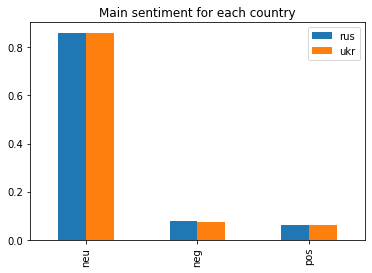

In [13]:
pd.DataFrame({'rus': rus_tweets['highest_score'].value_counts(normalize=True), 
             'ukr': ukr_tweets['highest_score'].value_counts(normalize=True)}).plot(kind = 'bar')
plt.title('Main sentiment for each country')
plt.show()

We can see how the sentiment of tweets is mostly neutral both for Ukraine and Russia. For now, we will restrict our analysis to tweets that are not entirely neutral (at least one of pos or neg has to be >0).

It is also important to note that these tweets are only a subset (2500/day) of the total and are only in english, therefore might not be the most representative sample! 

In [14]:
#Let's divide the sentiment before and after 24th of February

In [15]:
rus_before = rus_tweets.loc[ rus_tweets['time']< pd.to_datetime('23-01-2022', utc = True)]
rus_after = rus_tweets.loc[ rus_tweets['time']>= pd.to_datetime('23-01-2022', utc = True)]
ukr_before = ukr_tweets.loc[ ukr_tweets['time']< pd.to_datetime('23-01-2022', utc = True)]
ukr_after = ukr_tweets.loc[ ukr_tweets['time']>= pd.to_datetime('23-01-2022', utc = True)]

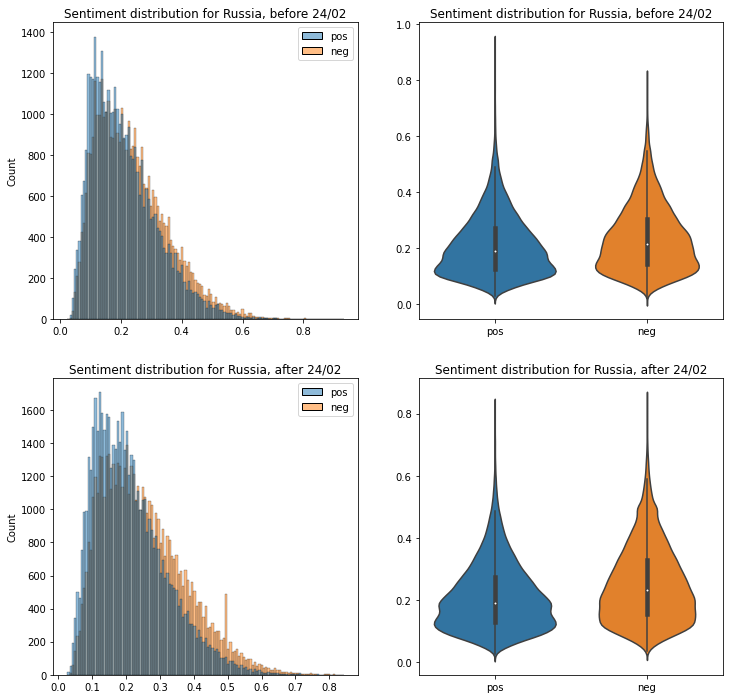

In [16]:
fig, axs = plt.subplots(2,2, figsize = (12,12))
sns.histplot(data = rus_before.loc[(rus_before['pos']>0) & (rus_before['neg']>0),['pos', 'neg']], alpha = .5, ax = axs[0,0])
sns.violinplot(data = rus_before.loc[(rus_before['pos']>0) & (rus_before['neg']>0), ['pos','neg']], ax = axs[0,1])
sns.histplot(data = rus_after.loc[(rus_after['pos']>0) & (rus_after['neg']>0),['pos', 'neg']], alpha = .5, ax = axs[1,0])
sns.violinplot(data = rus_after.loc[(rus_after['pos']>0) & (rus_after['neg']>0), ['pos','neg']], ax = axs[1,1])

axs[0,0].set_title('Sentiment distribution for Russia, before 24/02')
axs[0,1].set_title('Sentiment distribution for Russia, before 24/02')
axs[1,0].set_title('Sentiment distribution for Russia, after 24/02')
axs[1,1].set_title('Sentiment distribution for Russia, after 24/02')
plt.show()

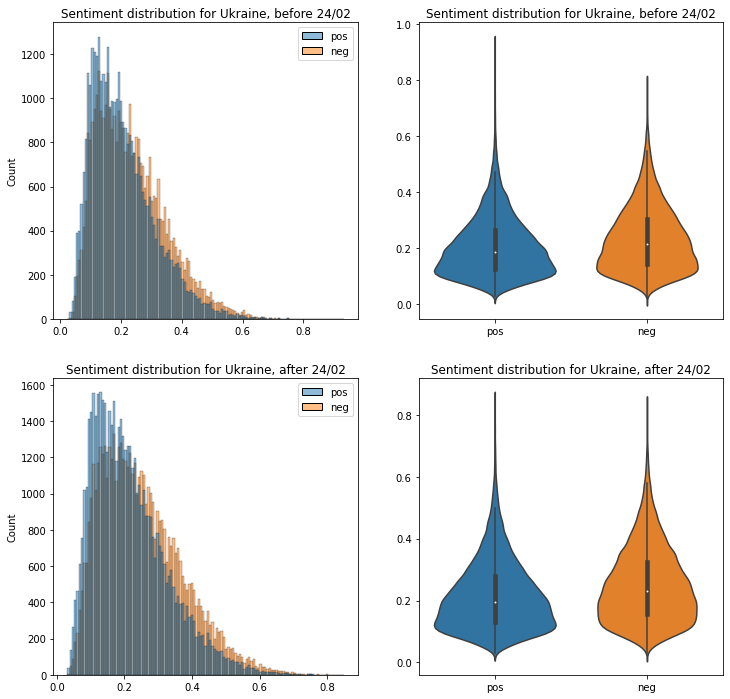

In [17]:
fig, axs = plt.subplots(2,2, figsize = (12,12))
sns.histplot(data = ukr_before.loc[(ukr_before['pos']>0) & (ukr_before['neg']>0),['pos', 'neg']], alpha = .5, ax = axs[0,0])
sns.violinplot(data = ukr_before.loc[(ukr_before['pos']>0) & (ukr_before['neg']>0), ['pos','neg']], ax = axs[0,1])
sns.histplot(data = ukr_after.loc[(ukr_after['pos']>0) & (ukr_after['neg']>0),['pos', 'neg']], alpha = .5, ax = axs[1,0])
sns.violinplot(data = ukr_after.loc[(ukr_after['pos']>0) & (ukr_after['neg']>0), ['pos','neg']], ax = axs[1,1])

axs[0,0].set_title('Sentiment distribution for Ukraine, before 24/02')
axs[0,1].set_title('Sentiment distribution for Ukraine, before 24/02')
axs[1,0].set_title('Sentiment distribution for Ukraine, after 24/02')
axs[1,1].set_title('Sentiment distribution for Ukraine, after 24/02')
plt.show()

In [18]:
#Most common words before and after 24/02
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ukr_bef_words = [obs['text'] for n, obs in ukr_before.iterrows()]
ukr_bef_words = ' '.join(ukr_bef_words)

ukr_aft_words = [obs['text'] for n, obs in ukr_after.iterrows()]
ukr_aft_words = ' '.join(ukr_aft_words)

rus_bef_words = [obs['text'] for n, obs in rus_before.iterrows()]
rus_bef_words = ' '.join(rus_bef_words)

rus_aft_words = [obs['text'] for n, obs in rus_after.iterrows()]
rus_aft_words = ' '.join(rus_aft_words)

#Remove 'Russia' and 'Ukraine' from the list of words..
ukr_bef_words = word_removal(ukr_bef_words)   
ukr_aft_words = word_removal(ukr_aft_words)   
rus_bef_words = word_removal(rus_bef_words)   
rus_aft_words = word_removal(rus_aft_words)   

(-0.5, 399.5, 199.5, -0.5)

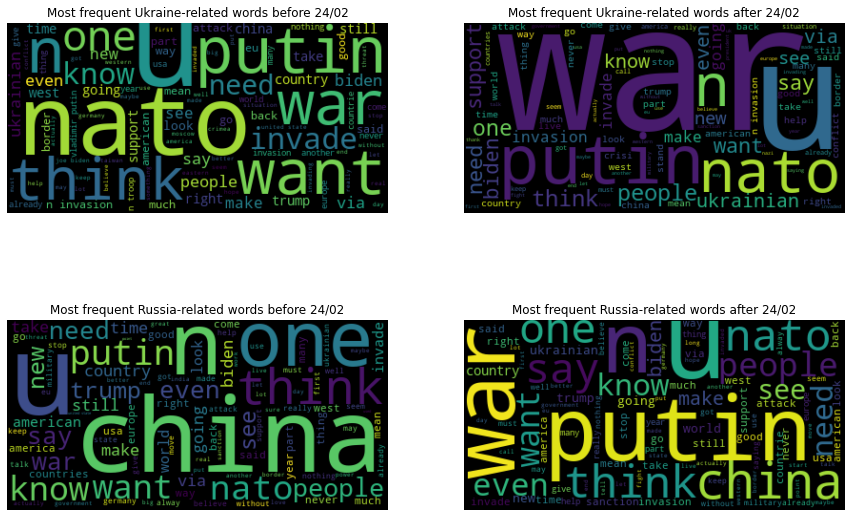

In [19]:
fig, axs = plt.subplots(2,2,figsize = (15,10))
wordcloud_ukrbef = WordCloud(max_words = 100).generate(ukr_bef_words)
axs[0,0].imshow(wordcloud_ukrbef, interpolation='bilinear')
axs[0,0].set_title('Most frequent Ukraine-related words before 24/02')
axs[0,0].axis("off")

wordcloud_ukraft = WordCloud(max_words = 100).generate(ukr_aft_words)
axs[0,1].imshow(wordcloud_ukraft, interpolation='bilinear')
axs[0,1].set_title('Most frequent Ukraine-related words after 24/02')
axs[0,1].axis("off")

wordcloud_rusbef = WordCloud(max_words = 100).generate(rus_bef_words)
axs[1,0].imshow(wordcloud_rusbef, interpolation='bilinear')
axs[1,0].set_title('Most frequent Russia-related words before 24/02')
axs[1,0].axis("off")

wordcloud_rusaft = WordCloud(max_words = 100).generate(rus_aft_words)
axs[1,1].imshow(wordcloud_rusaft, interpolation='bilinear')
axs[1,1].set_title('Most frequent Russia-related words after 24/02')
axs[1,1].axis("off")

### Time series visualization
It's now time for the graph that I started the entire project for: a trend analysis of the two groups' sentiment! 

In [20]:
ukr_dailyavg = ukr_tweets.groupby(pd.Grouper(key="time", freq="1d")).mean()
rus_dailyavg = rus_tweets.groupby(pd.Grouper(key="time", freq="1d")).mean()

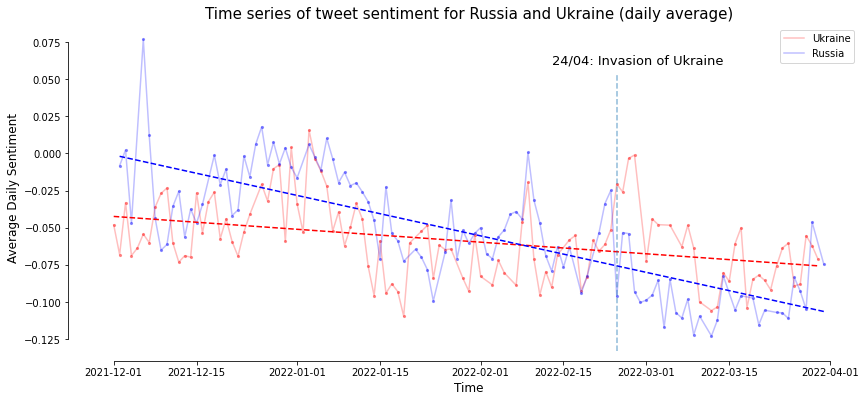

In [21]:
fig, axs = plt.subplots(1,1, figsize = (14,6))
col1 = 'r'
col2 = 'b'

sns.lineplot(data = ukr_dailyavg, x = ukr_dailyavg.index, y = 'compound', color = col1, ax = axs, alpha = .25, label = 'Ukraine')
sns.lineplot(data = rus_dailyavg, x = rus_dailyavg.index, y = 'compound', color = col2, ax = axs, alpha = .25, label = 'Russia')

sns.scatterplot(data = ukr_dailyavg, x = ukr_dailyavg.index, y = 'compound', color = col1, ax = axs, alpha = .5, s=10)
sns.scatterplot(data = rus_dailyavg, x = rus_dailyavg.index, y = 'compound', color = col2, ax = axs, alpha = .5, s=10)

x = mdates.date2num(ukr_dailyavg.dropna().index)
y = ukr_dailyavg['compound'].dropna()
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),f"{col1}--")

x = mdates.date2num(rus_dailyavg.dropna().index)
y = rus_dailyavg['compound'].dropna()
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),f"{col2}--")

plt.title('Time series of tweet sentiment for Russia and Ukraine (daily average)', fontsize=15)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Average Daily Sentiment', fontsize=12)
sns.despine(offset=10, trim=True)

plt.axvline(dt.datetime(2022, 2, 24), ymin = 0, ymax = .85, label = '24/02/2022', alpha = .5, ls = '--')
plt.text(dt.datetime(2022, 2, 13), .060,'24/04: Invasion of Ukraine',fontsize = 13)

plt.show()

And that's it (at least for now)! We can see how the average sentiment of both countries faced a downward trend over the past months (which is expected, as words like 'war' have a negative score of 1). \
It is also interesting to note that Russia - which used to have a higher sentiment than Ukraine - has faced a steeper decline and has been surpassed by Ukraine after the conflict.